In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
data=pd.read_excel('Folds5x2_pp.xlsx')
data=data.sample(frac=1)
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
X=data[['AT', 'V', 'AP', 'RH']].values
Y=data[['PE']].values
scaler=StandardScaler()
scaler.fit_transform(X)


array([[ 0.59027367,  1.06429155, -0.65826315, -0.6513219 ],
       [-0.57584312, -1.05576155, -0.95463562,  0.87475716],
       [ 0.11658066, -0.827545  ,  0.44471393, -0.35679138],
       ...,
       [-0.72882047, -0.73153665,  0.15339327, -0.21706062],
       [ 0.9244084 ,  1.1941389 , -0.430932  , -0.49446728],
       [-1.90030488, -1.06205718,  0.19717556,  1.17134254]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.25)

In [ ]:
X_test=X_valid[500:550]
Y_test=Y_valid[500:550]

No of neurons in hidden layer  2
Train: 204907.641, Test: 205693.500


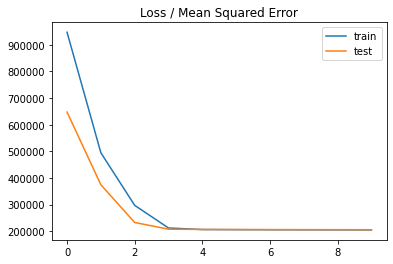

No of neurons in hidden layer  3
Train: 69.098, Test: 71.741


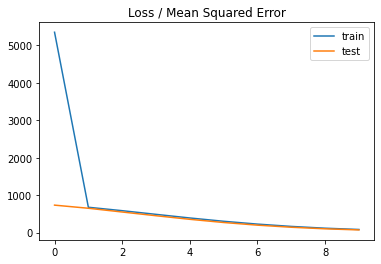

No of neurons in hidden layer  4
Train: 64.235, Test: 66.805


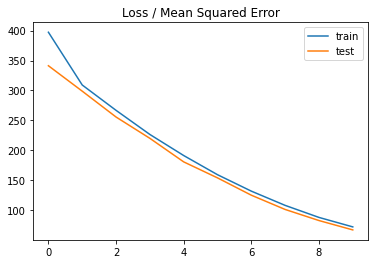

No of neurons in hidden layer  5
Train: 114.713, Test: 119.795


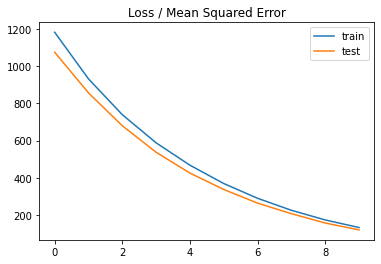

No of neurons in hidden layer  6
Train: 26.345, Test: 25.921


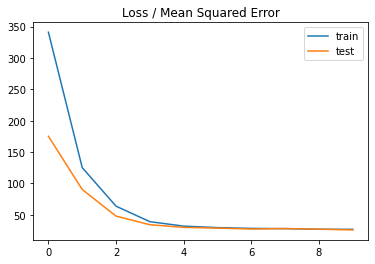

No of neurons in hidden layer  7
Train: 222.415, Test: 232.257


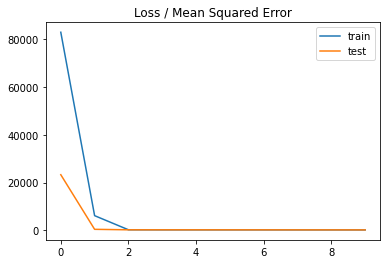

No of neurons in hidden layer  8
Train: 27.995, Test: 27.439


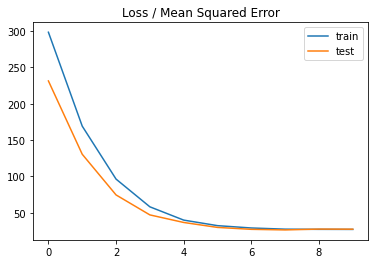

No of neurons in hidden layer  9
Train: 178.049, Test: 188.892


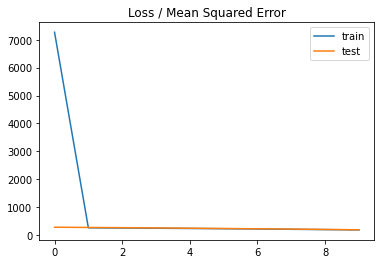

No of neurons in hidden layer  10
Train: 55.723, Test: 59.713


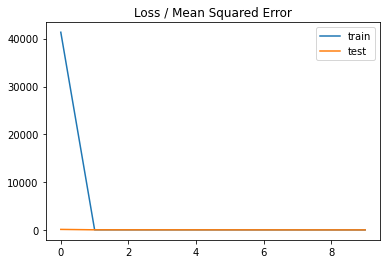

No of neurons in hidden layer  11
Train: 402.391, Test: 417.042


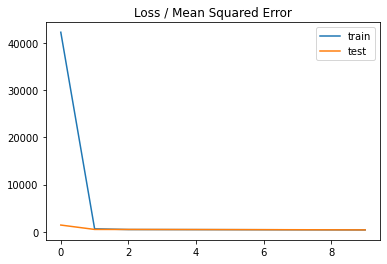

No of neurons in hidden layer  12
Train: 43.028, Test: 46.175


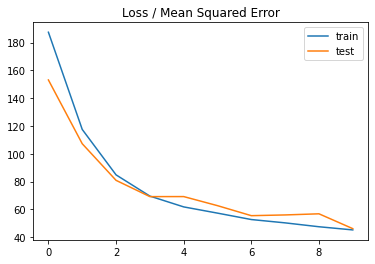

No of neurons in hidden layer  13
Train: 107.536, Test: 113.678


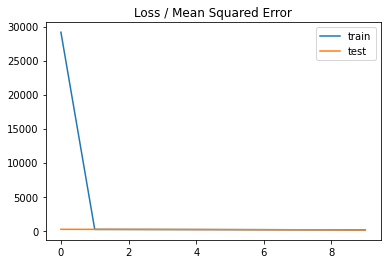

No of neurons in hidden layer  14
Train: 1375.979, Test: 1430.772


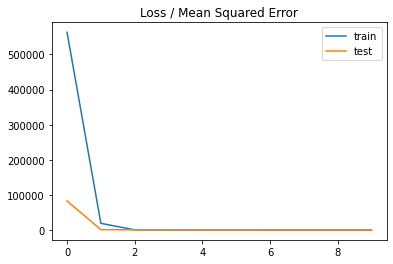

No of neurons in hidden layer  15
Train: 294.961, Test: 308.041


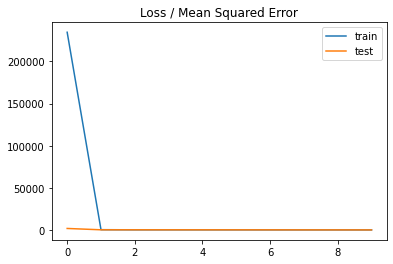

No of neurons in hidden layer  16
Train: 228.060, Test: 240.710


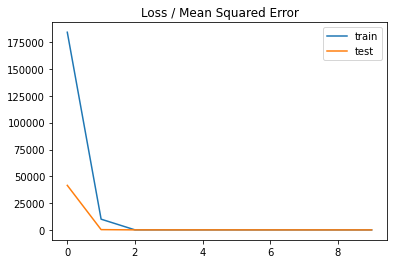

No of neurons in hidden layer  17
Train: 43.801, Test: 46.880


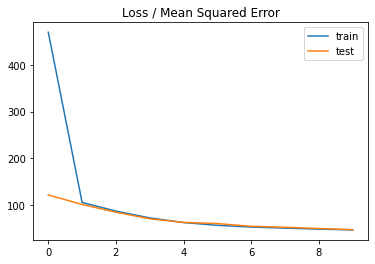

No of neurons in hidden layer  18
Train: 132.249, Test: 137.721


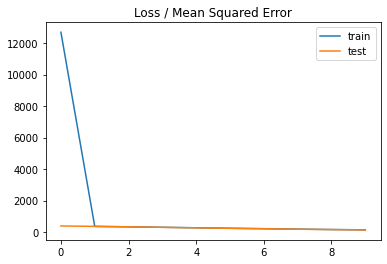

No of neurons in hidden layer  19
Train: 49.208, Test: 51.762


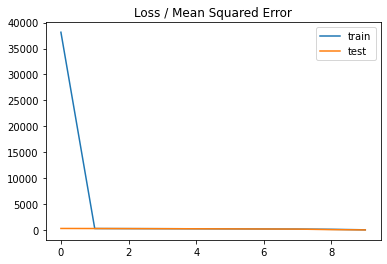

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

# define model
for id in range(2,6,1):
  print("No of neurons in hidden layer ",id)
  model = Sequential()
  model.add(Dense(id, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='linear'))
  opt = 'adam'
  model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
  history = model.fit(X_train,Y_train, validation_data=(X_valid,Y_valid), epochs=10, verbose=0)
# evaluate the model
  train_mse = model.evaluate(X_train,Y_train, verbose=0)
  test_mse = model.evaluate(X_valid, Y_valid, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
  pyplot.title('Loss / Mean Squared Error')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = 'adam'
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(X_train,Y_train, validation_data=(X_valid,Y_valid), epochs=20, verbose=0)
# evaluate the model
train_mse = model.evaluate(X_train,Y_train, verbose=0)
test_mse = model.evaluate(X_valid, Y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 26.614, Test: 26.207


[array([464.4569], dtype=float32),
 array([446.11975], dtype=float32),
 array([473.71225], dtype=float32),
 array([444.90454], dtype=float32),
 array([451.14655], dtype=float32),
 array([449.4383], dtype=float32),
 array([477.9259], dtype=float32),
 array([457.2904], dtype=float32),
 array([468.91235], dtype=float32),
 array([464.4477], dtype=float32),
 array([444.24902], dtype=float32),
 array([469.8035], dtype=float32),
 array([424.03662], dtype=float32),
 array([437.11942], dtype=float32),
 array([469.52258], dtype=float32),
 array([467.78995], dtype=float32),
 array([442.5423], dtype=float32),
 array([447.93542], dtype=float32),
 array([431.34015], dtype=float32),
 array([456.433], dtype=float32),
 array([449.41852], dtype=float32),
 array([463.3423], dtype=float32),
 array([449.4616], dtype=float32),
 array([432.04156], dtype=float32),
 array([446.0656], dtype=float32),
 array([440.38458], dtype=float32),
 array([474.6585], dtype=float32),
 array([448.30713], dtype=float32),
 arra

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)
Y_prediction=[]
for i in y_pred:
  Y_prediction.append(i)
Y_actual=[]
for i in Y_test:
  Y_actual.append(i)
results=pd.DataFrame(columns=['Y_actual','Y_prediction'])
results['Y_actual']=Y_actual
results['Y_prediction']=Y_prediction
results.head(50)

[[464.4569 ]
 [446.11975]
 [473.71225]
 [444.90454]
 [451.14655]
 [449.4383 ]
 [477.9259 ]
 [457.2904 ]
 [468.91235]
 [464.4477 ]
 [444.24902]
 [469.8035 ]
 [424.03662]
 [437.11942]
 [469.52258]
 [467.78995]
 [442.5423 ]
 [447.93542]
 [431.34015]
 [456.433  ]
 [449.41852]
 [463.3423 ]
 [449.4616 ]
 [432.04156]
 [446.0656 ]
 [440.38458]
 [474.6585 ]
 [448.30713]
 [472.13306]
 [452.85773]
 [471.36362]
 [470.4402 ]
 [432.36423]
 [443.61902]
 [431.27875]
 [432.0349 ]
 [468.82785]
 [478.68512]
 [437.1474 ]
 [465.83063]
 [461.60025]
 [459.70435]
 [479.1419 ]
 [448.67917]
 [446.24405]
 [471.30307]
 [432.68866]
 [467.5583 ]
 [456.26486]
 [454.78152]]


,Y_actual,Y_prediction
0,[460.02],[464.4569]
1,[444.69],[446.11975]
2,[475.9],[473.71225]
3,[438.36],[444.90454]
4,[451.08],[451.14655]
5,[457.89],[449.4383]
6,[486.36],[477.9259]
7,[466.4],[457.2904]
8,[461.06],[468.91235]
9,[473.38],[464.4477]
